<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2024 </h2></center> 
<center><h3> Lab 5</h3></center> 
<center><h3> </h3></center> 
<center><h3> Vizualizacija podataka 2</h3></center> 

Ovo je vježba o vizualizaciji podataka! Koristit će se uobičajene python biblioteke, Matplotlib i Seaborn za stvaranje učinkovitih i jasnih vizualizacija. Radit ćete na skupu podataka koji sadrži informacije o deset filmova s najvećom zaradom svake godine.

Ovo su vizualizacije koje će se napraviti, a koje ćete koristiti za rješavanje vježbe:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Osim Matplotliba i Searbona, postoji mnogo više resursa koji bi vam mogli biti korisni, na primjer:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) te [Folium](https://python-visualization.github.io/folium/)

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, re
import seaborn as sns

episodes = pd.read_csv('simpsons_episodes.csv')

In [4]:
# extract some datetime variables
episodes['datetime'] = pd.to_datetime(episodes['original_air_date'])
episodes['datetime_year'] = episodes['datetime'].dt.year
episodes['datetime_month'] =episodes['datetime'].dt.month
episodes['datetime_day'] =episodes['datetime'].dt.day
episodes['datetime-MM-DD'] = episodes['datetime'].dt.strftime('%m-%d')

# 1. Tutorial: Korištenje biblioteke za vizualizaciju podataka

Koristit će se dataset blockbustera. Sažetak feature-a:

- *title*: Episode title
- *original_air_date*
- *production_code*
- *season*
- *number_in_season*
- *number_in_series*
- *us_viewers_in_millions*
- *views*
- *imdb_rating*
- *imdb_votes*
- *image_url*
- *video_url*

## Vizualizacija dviju kontinuiranih varijabli

- Je li se smanjivao IMDB rating i US views kroz godine
- Postoji mnogo načina kako se može ispitati odnos između dvije varijable. Najjednostavniji je dijagram scatterplot, koristeći plt.scatterplot()

Text(0, 0.5, 'IMDB rating')

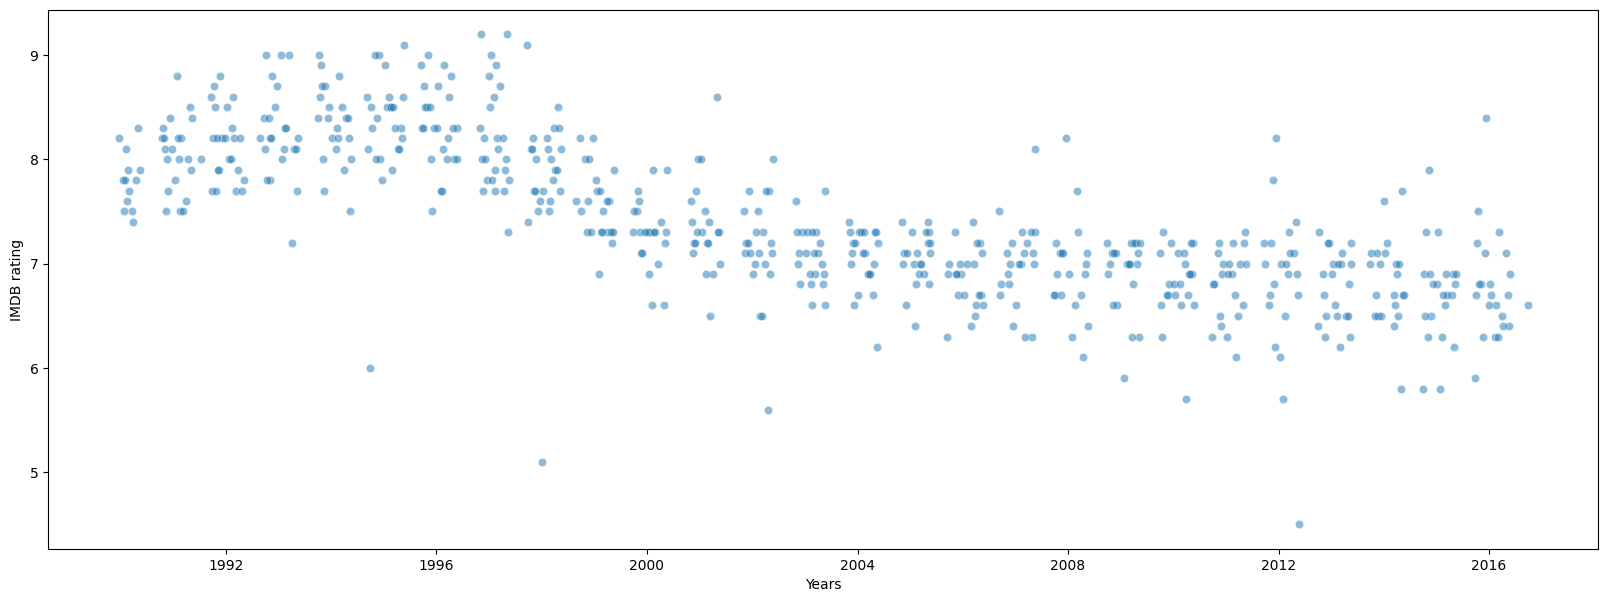

In [5]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=episodes, x='datetime', y='imdb_rating', alpha=0.5)
plt.xlabel('Years')
plt.ylabel('IMDB rating')

## Vizualizacija dviju varijabli, kontinuiranih i kategoričkih

- Razmotrimo IMDB rating i US views kroz godine i sezone emitiranja
- Prikazat ćemo barplot, boxplot i violinplot. Seaborn nudi mnogo više uvjerljivih vizualizacija. Bacite oko na primjere: https://seaborn.pydata.org/examples/index.html

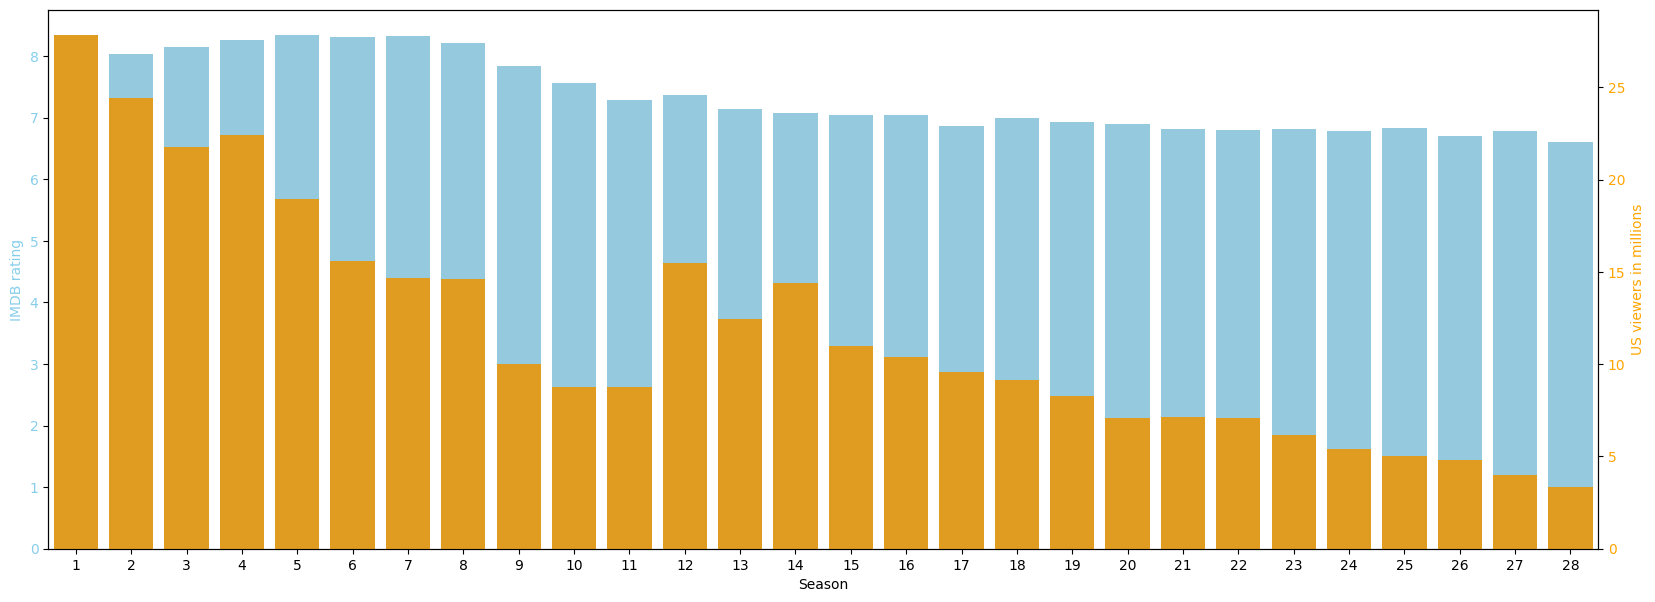

In [6]:
# barplot
# plt.figure(figsize=(20, 7))
# plt.subplot(2,1,1)
# sns.barplot(data=episodes, x='season', y='imdb_rating', errorbar=None)
# plt.xlabel('Season')
# plt.ylabel('IMDB rating')

# plt.subplot(2,1,2)
# sns.barplot(data=episodes, x='season', y='us_viewers_in_millions', errorbar=None)
# plt.xlabel('Season')
# plt.ylabel('US viewers in millions')

fig, ax1 = plt.subplots(figsize=(20,7))

# first barplot
sns.barplot(data=episodes, x='season', y='imdb_rating', errorbar=None, ax=ax1, color='skyblue')
ax1.set_xlabel("Season")
ax1.set_ylabel("IMDB rating", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# second barplot
ax2 = ax1.twinx()
sns.barplot(data=episodes, x='season', y='us_viewers_in_millions', errorbar=None, ax=ax2, color='orange')
ax2.set_ylabel('US viewers in millions', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()

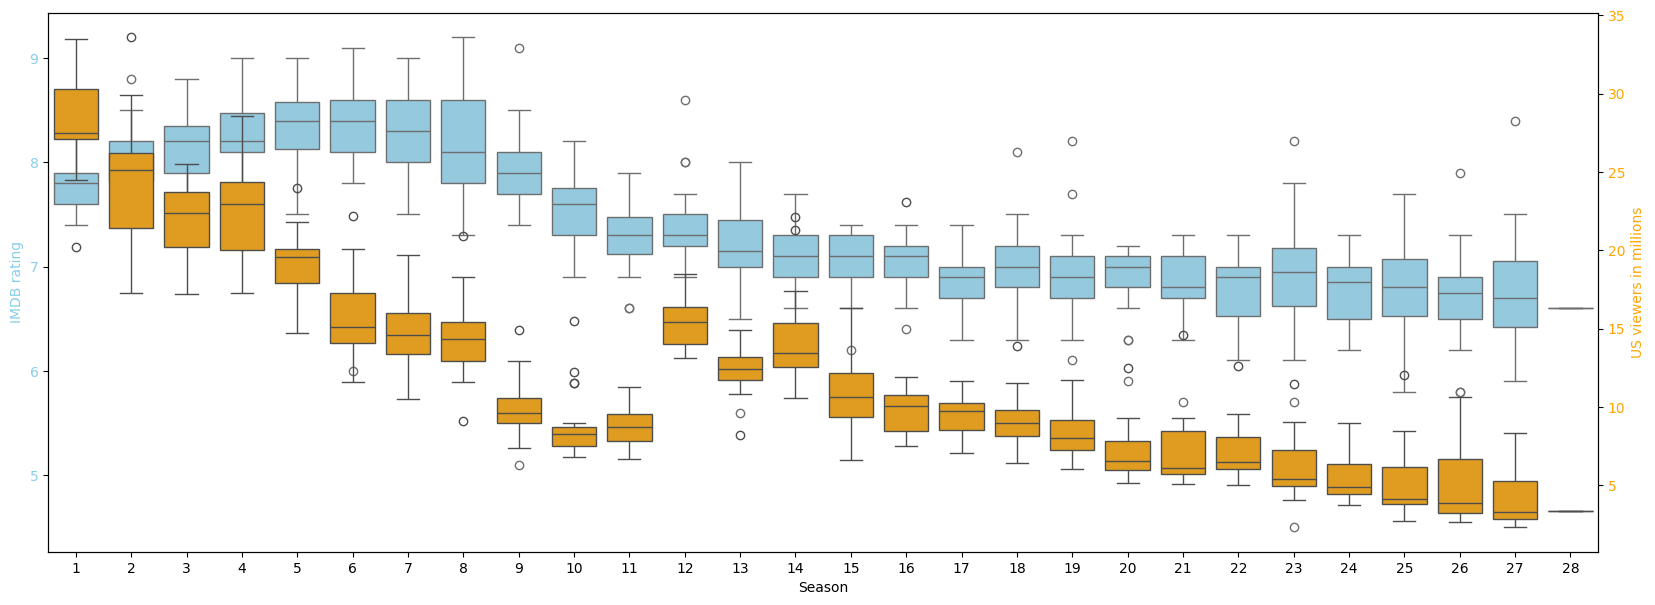

In [7]:
#boxplot

fig, ax1 = plt.subplots(figsize=(20,7))

# first boxplot
sns.boxplot(data=episodes, x='season', y='imdb_rating', ax=ax1, color='skyblue')
ax1.set_xlabel("Season")
ax1.set_ylabel("IMDB rating", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# second boxplot
ax2 = ax1.twinx()
sns.boxplot(data=episodes, x='season', y='us_viewers_in_millions', ax=ax2, color='orange')
ax2.set_ylabel('US viewers in millions', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()

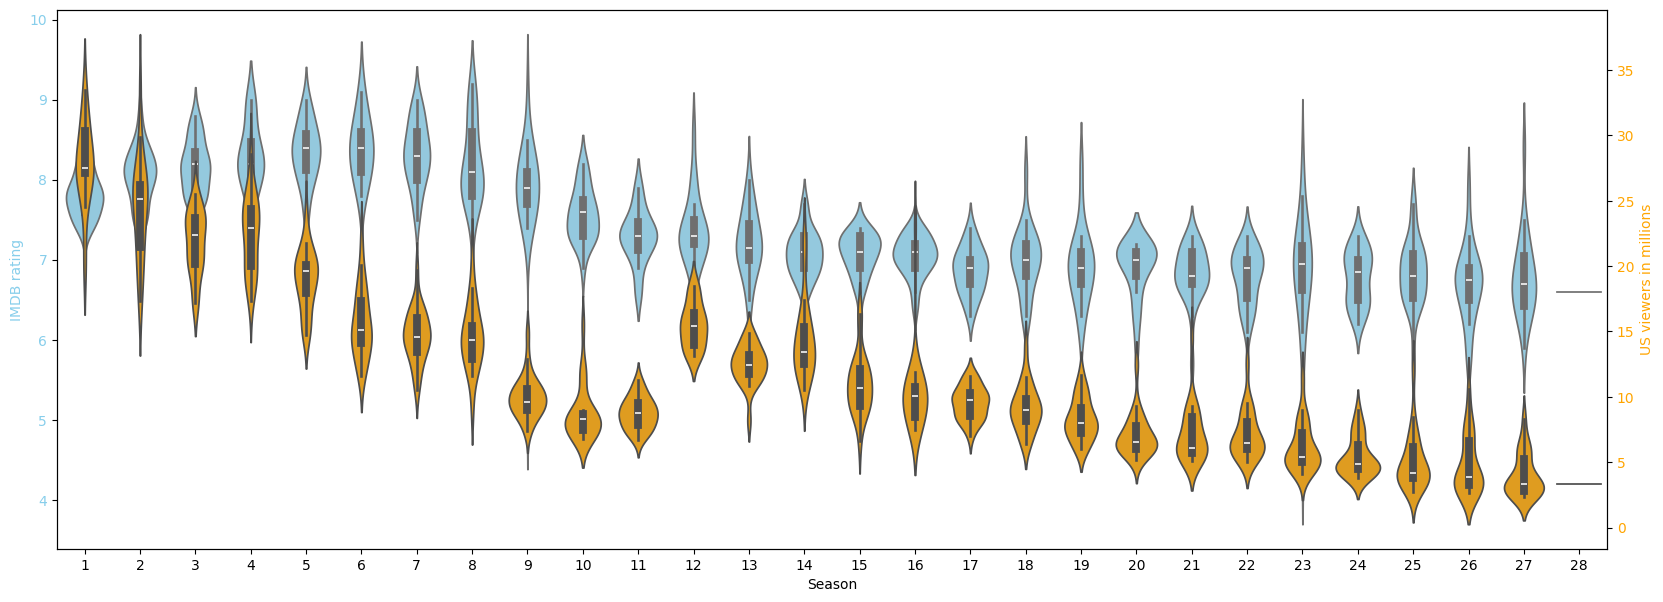

In [8]:
# violinplot

fig, ax1 = plt.subplots(figsize=(20,7))

# first violinplot
sns.violinplot(data=episodes, x='season', y='imdb_rating', ax=ax1, color='skyblue')
ax1.set_xlabel("Season")
ax1.set_ylabel("IMDB rating", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# second violinplot
ax2 = ax1.twinx()
sns.violinplot(data=episodes, x='season', y='us_viewers_in_millions', ax=ax2, color='orange')
ax2.set_ylabel('US viewers in millions', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()


# 2. Vježbe: Izrada naprednijih vizualizacija

Da bismo napravili dobru vizualizaciju podataka, prvo trebamo imati jasnu ideju o tome što želimo vizualizirati! Objedinjujemo li podatke i kako? Koja bi količina trebala biti na različitim osima? Kako koristiti boje i veličine predmeta? Često pomaže ručno skicirati vizualizaciju prije nego što je kodirate.

U sljedećoj vježbi dobit ćete opise vizualizacija koje bi mogle biti korisne za razumijevanje skupa podataka o filmovima.

## 2.1 Heatmape

- Vizualizirajte IMDB i US views kroz sezone te koristite funkciju Seaborn heatmap te funkciju *pivot* of pandasa

- Konačno, heatmapom možemo predstaviti tri varijable, kodiranjem treće varijable bojom. Pokažite kako sa sezonom opada IMDB ocjena i US views korištenjem heatmape


In [9]:
# Napišite svoj kod ovdje da biste kreirali drugu heatmapu

season_ratings = episodes.groupby('season')['imdb_rating'].mean()

season_ratings = season_ratings.to_frame()

plt.figure(figsize=(6,0))

<Figure size 600x0 with 0 Axes>

<Figure size 600x0 with 0 Axes>

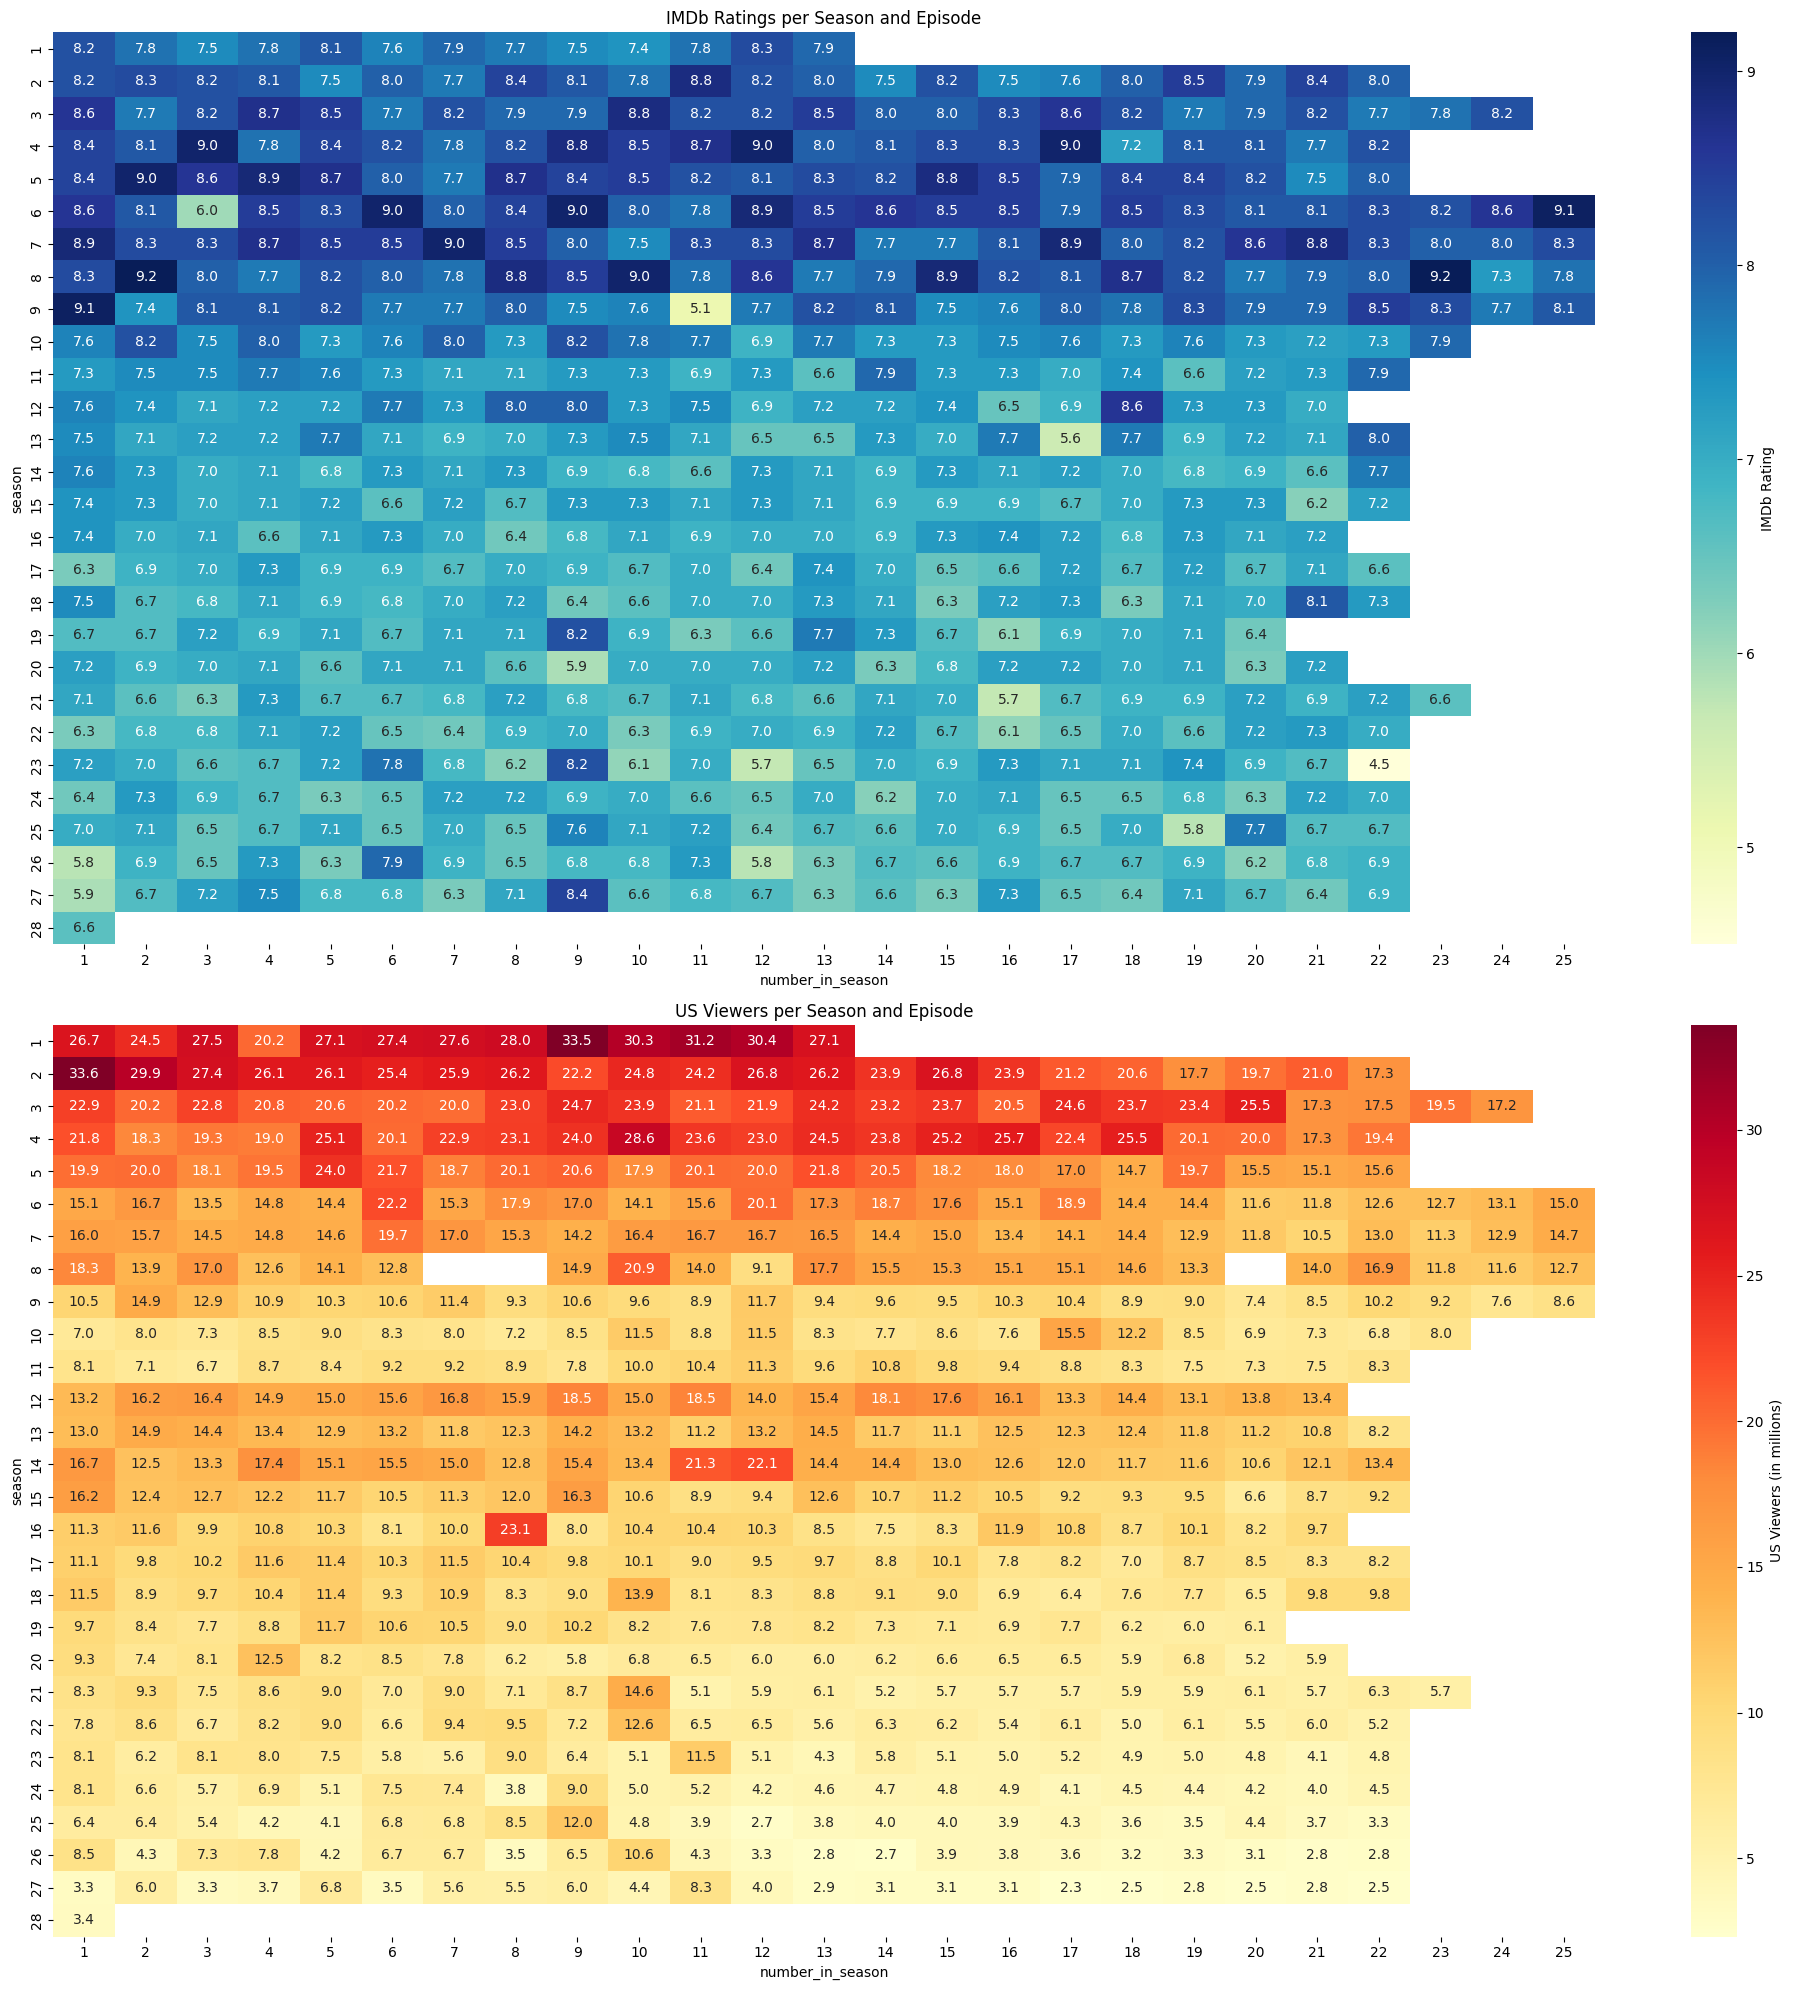

In [10]:
# Napišite svoj kod ovdje da biste kreirali drugu heatmapu

# Pivotiranje podataka za IMDb ocjene
imdb_pivot = episodes.pivot_table(
    values='imdb_rating',
    index='season',
    columns='number_in_season',
    aggfunc='mean'
)

# Pivotiranje podataka za gledanost u milijunima
us_viewers_pivot = episodes.pivot_table(
    values='us_viewers_in_millions',
    index='season',
    columns='number_in_season',
    aggfunc='mean'
)

# Postavljanje veličine grafikona
plt.figure(figsize=(20, 20))

# Heatmap za IMDb ocjene
plt.subplot(2, 1, 1)
sns.heatmap(imdb_pivot, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'IMDb Rating'})
plt.title('IMDb Ratings per Season and Episode')

# Heatmap za Gledanost u milijunima
plt.subplot(2, 1, 2)
sns.heatmap(us_viewers_pivot, cmap="YlOrRd", annot=True, fmt=".1f", cbar_kws={'label': 'US Viewers (in millions)'})
plt.title('US Viewers per Season and Episode')

# Prikazivanje grafikona
plt.tight_layout()
plt.show()
